In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from vae.arch import VAE

from os import listdir
from os.path import isfile, join

import cv2



Using TensorFlow backend.


In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [3]:
data = np.load('./data/obs_valid.npz')["arr_0"]
data = np.array([item for obs in data for item in obs])
# np.savez_compressed('./data/obs_valid', data[:600])

In [4]:
print(data.shape)


(12320, 64, 64, 3)


In [5]:
path = "./vae/"
files = [f for f in listdir(path)  if f[-3:] == ".h5"]
files.sort()
dropdown = widgets.Dropdown(
    options=files,
    description='Weight file:',
)
display(dropdown)

Dropdown(description='Weight file:', options=('good.h5', 'weights.h5', 'weights_VAE-original-date:2019-03-19 1…

In [8]:
vae = VAE()
vae.set_weights("./vae/" + dropdown.value)
# vae.model.summary()


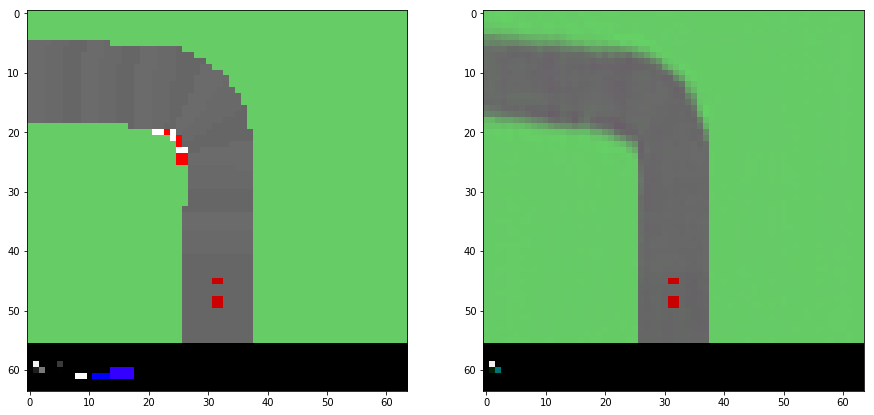

In [9]:
def compare(index):
    f, axarr = plt.subplots(1, 2, figsize=(15,15))
    img = data[index]

    axarr[0].imshow(img)

    dream_img = vae.model.predict(x = np.expand_dims(img, axis=0))
    axarr[1].imshow(dream_img[0])
    

#30, 46, 70, 545
compare(30)


In [17]:
img = data[30]
latent = vae.encoder.predict(x = np.expand_dims(img, axis=0))
index = 0

def draw():
    f, axarr = plt.subplots(1, 2, figsize=(15,15))
    axarr[0].imshow(img)
    dream_img = vae.decoder.predict(x = latent)
    axarr[1].imshow(dream_img[0])

def change_index(ivalue):
    global index, value_slider
    index = ivalue
    value_slider.value=latent[0][index]
    
def change_value(value):
    global latent
    latent[0][index] = value
    draw()

index_slider = widgets.IntSlider(description="index", readout=True, min=0, max=len(latent[0])-1, value=0, 
                                    continuous_update=False, orientation="horizontal", layout={'width':'90%'})
iindex = interactive(change_index, ivalue=index_slider)
value_slider = widgets.FloatSlider(readout=True, min=-3, max=3, value=latent[0][index], 
                                    continuous_update=False, orientation="horizontal", layout={'width':'90%'})
ivalue = interactive(change_value, value=value_slider)
vbox = widgets.VBox([iindex, ivalue])

display(vbox)
# good.h5: 9: -1,3

In [12]:
def create_video(vae, data):
    writer = cv2.VideoWriter('demo.avi', 0, 30, (128, 64))

    for i in range(0, 200):
        img = data[i]
        predicted = np.uint8(vae.model.predict(x = np.expand_dims(img, axis=0))[0][...,[2,1,0]] * 255)
        img = np.uint8(img[...,[2,1,0]] * 255)
        frame = np.append(img, predicted, axis = 1)
        writer.write(frame)

In [ ]:
create_video(vae, data)

In [ ]:
#%%javascript
#Jupyter.notebook.session.delete();